In [1]:
import ROOT
import sys
import numpy as np
import matplotlib.pyplot as plt
import csv

Welcome to JupyROOT 6.26/04


In [2]:
#  caen_muon_v01d_multi_files
#  This version is for Run >= 71,  which uses Tref [-75:-25] 

csvname="/Users/kunori/skdir/CAEN/dfiles/MuonTestStand/Run28_list.csv"

# Cde updated for Tref 50 ns, Tref shift -75 ns

# runlist = np.arange(30,40,1,dtype=int)
# runlist = np.arange(41,49,1,dtype=int)
runlist = np.arange(160,162,1,dtype=int)

#  pre-set for pdf plot file name
prepdf="plotdir/plotMTS_run"+str(runlist[0])+"_"
postpdf=".pdf"

csvdir="/Users/kunori/skdir/CAEN/dfiles/MuonTestStand/"

# global valiables
totalEventCount=0
runEventCount=np.zeros(len(runlist))
h1={}
h2={}
hp={}


sipm2caen=np.array([61,63,32,34,29,31,0,2,
          59,57,38,36,27,25,6,4,
          53,55,40,42,21,23,8,10,
          51,49,46,44,19,17,14,12,
          45,47,48,50,13,15,16,18,
          43,41,54,52,11,9,22,20,
          37,39,56,58,5,7,24,26,
          35,33,62,60,3,1,30,28])

caen2sipm=np.zeros(64,dtype=int)
for i in range(0,64):
    k=i 
    caen2sipm[sipm2caen[k]]=i

    
#  x:  left to right
#  y:  bottom to top
xy2caen=np.array([35,37,43,45,51,53,59,61,
                   33,39,41,47,49,55,57,63,
                   62,56,54,48,46,40,38,32,
                   60,58,52,50,44,42,36,34,
                   3,5,11,13,19,21,27,29,
                   1,7,9,15,17,23,25,31,
                   30,24,22,16,14,8,6,0,
                   28,26,20,18,12,10,4,2])

caen2xy=np.zeros(64,dtype=int)
for i in range(0,64):
    k=i 
    caen2xy[xy2caen[k]]=i

        
print("caen2sipm",caen2sipm)
print("caen2xy",caen2xy)

caen2sipm [ 6 61  7 60 15 52 14 53 22 45 23 44 31 36 30 37 38 29 39 28 47 20 46 21
 54 13 55 12 63  4 62  5  2 57  3 56 11 48 10 49 18 41 19 40 27 32 26 33
 34 25 35 24 43 16 42 17 50  9 51  8 59  0 58  1]
caen2xy [55 40 63 32 62 33 54 41 53 42 61 34 60 35 52 43 51 44 59 36 58 37 50 45
 49 46 57 38 56 39 48 47 23  8 31  0 30  1 22  9 21 10 29  2 28  3 20 11
 19 12 27  4 26  5 18 13 17 14 25  6 24  7 16 15]


In [3]:
def unpackData(row):
    rtcode=0
    BoardID=int(row[0])
    TStamp=float(row[1])
    
    LG=np.zeros(64)
    HG=np.zeros(64)
    TOA=np.zeros(64)
    TOT=np.zeros(64)
    data_type=np.zeros(64,dtype=int)
    
    i=4
    while i<len(row):
        chid=int(row[i])
        dtype=str(row[i+1])
        LG[chid]=float(row[i+2])
        HG[chid]=float(row[i+3])
        # print(chid,dtype,LG[chid],HG[chid])
        i=i+4
        if dtype == "0x3":
            TOA[chid]=0.0
            TOT[chid]=0.0
            data_type[chid]=1
        elif dtype == "0x13":
            TOA[chid]=float(row[i])
            TOT[chid]=0.0
            data_type[chid]=2
            i=i+1
        elif dtype == "0x23":
            TOA[chid]=0.0
            TOT[chid]=float(row[i])
            data_type[chid]=2
            i=i+1
        elif dtype == "0x33":
            TOA[chid]=float(row[i])
            TOT[chid]=float(row[i+1])
            data_type[chid]=3
            i=i+2
        else:
            data_type[chid]=4
            print("unpackData:  unkown data_type",dtype)
            print(row)
            rtcode=1
        
    # print(BoardID,TStamp)
    return rtcode,TStamp,LG,HG,TOA,TOT,data_type
    
    

start analyzing Run 160
/Users/kunori/skdir/CAEN/dfiles/MuonTestStand/Run160_list.csv
run 160  eventCount= 1  (orange: TOA tagged)


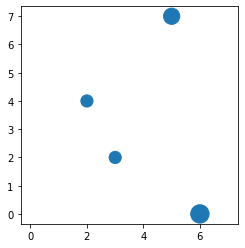

run 160  eventCount= 2  (orange: TOA tagged)


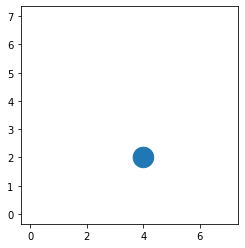

run 160  eventCount= 3  (orange: TOA tagged)


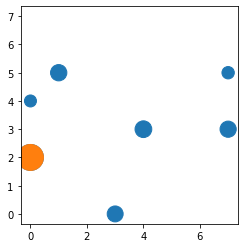

run 160  eventCount= 4  (orange: TOA tagged)


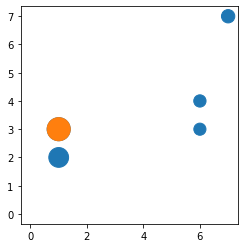

run 160  eventCount= 5  (orange: TOA tagged)


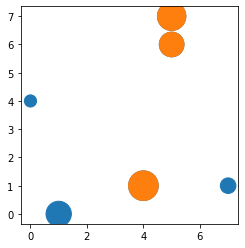

run 160  eventCount= 6  (orange: TOA tagged)


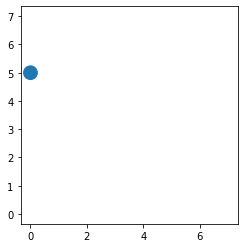

run 160  eventCount= 7  (orange: TOA tagged)


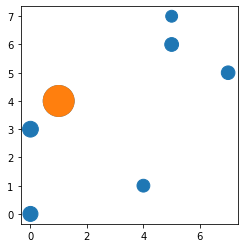

run 160  eventCount= 8  (orange: TOA tagged)


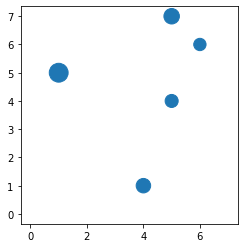

run 160  eventCount= 9  (orange: TOA tagged)


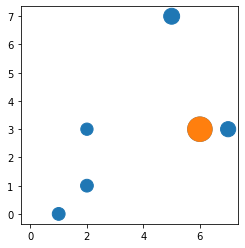

run 160  eventCount= 10  (orange: TOA tagged)


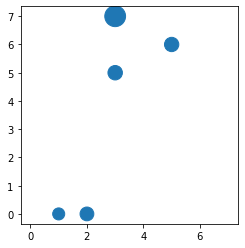

run 160  eventCount= 11  (orange: TOA tagged)


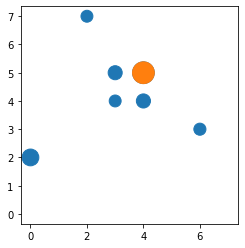

run 160  eventCount= 12  (orange: TOA tagged)


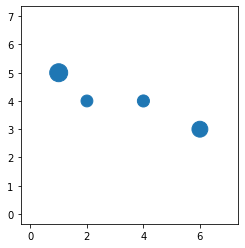

run 160  eventCount= 13  (orange: TOA tagged)


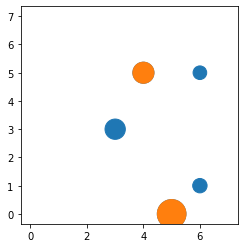

run 160  eventCount= 14  (orange: TOA tagged)


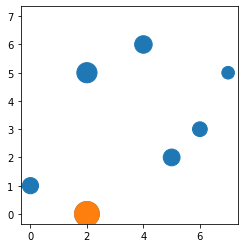

run 160  eventCount= 15  (orange: TOA tagged)


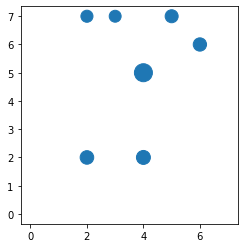

run 160  eventCount= 16  (orange: TOA tagged)


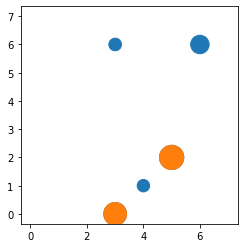

run 160  eventCount= 17  (orange: TOA tagged)


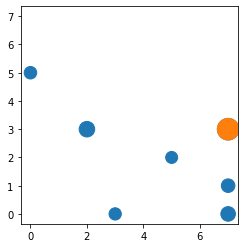

run 160  eventCount= 18  (orange: TOA tagged)


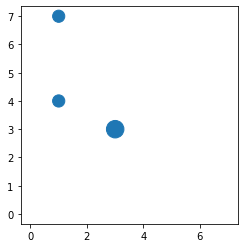

run 160  eventCount= 19  (orange: TOA tagged)


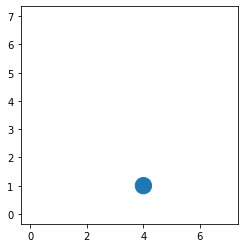

run 160  eventCount= 20  (orange: TOA tagged)


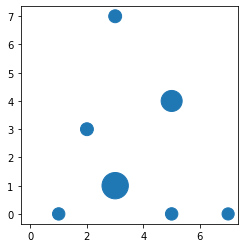

run 160  eventCount= 21  (orange: TOA tagged)


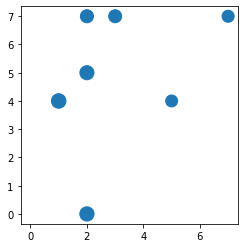

run 160  eventCount= 22  (orange: TOA tagged)


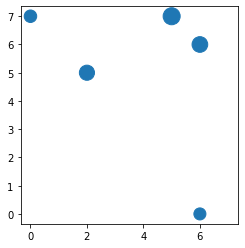

run 160  eventCount= 23  (orange: TOA tagged)


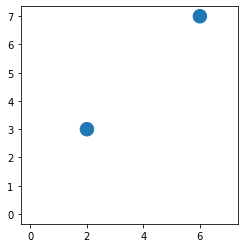

run 160  eventCount= 24  (orange: TOA tagged)


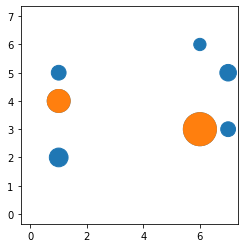

run 160  eventCount= 25  (orange: TOA tagged)


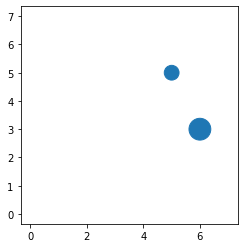

run 160  eventCount= 26  (orange: TOA tagged)


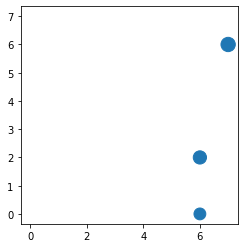

run 160  eventCount= 28  (orange: TOA tagged)


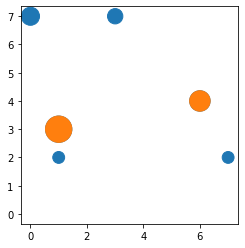

run 160  eventCount= 29  (orange: TOA tagged)


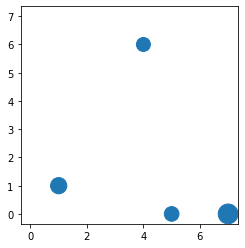

run 160  eventCount= 30  (orange: TOA tagged)


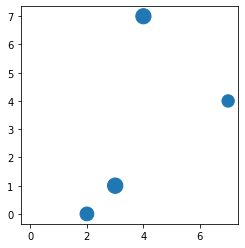

run 160  eventCount= 31  (orange: TOA tagged)


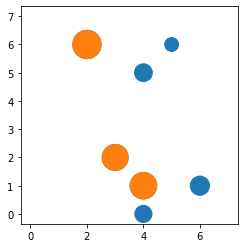

run 160  eventCount= 32  (orange: TOA tagged)


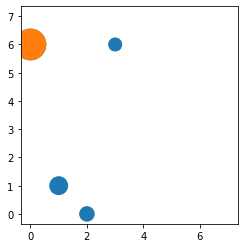

run 160  eventCount= 33  (orange: TOA tagged)


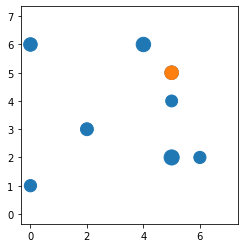

run 160  eventCount= 35  (orange: TOA tagged)


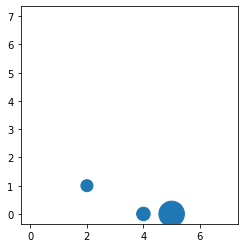

run 160  eventCount= 36  (orange: TOA tagged)


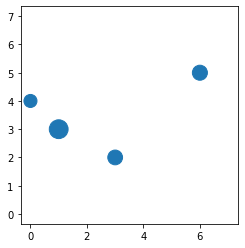

run 160  eventCount= 37  (orange: TOA tagged)


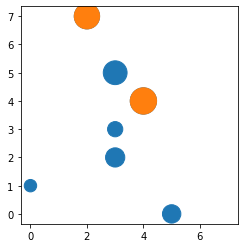

run 160  eventCount= 39  (orange: TOA tagged)


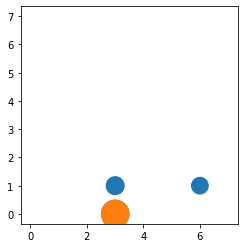

run 160  eventCount= 40  (orange: TOA tagged)


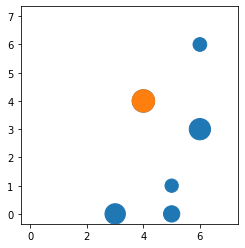

run 160  eventCount= 42  (orange: TOA tagged)


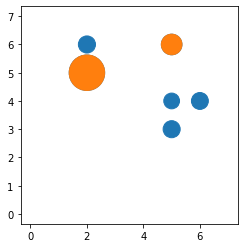

run 160  eventCount= 43  (orange: TOA tagged)


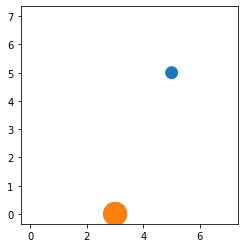

run 160  eventCount= 44  (orange: TOA tagged)


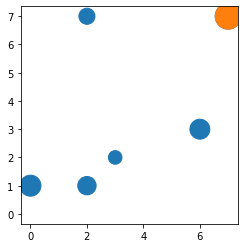

run 160  eventCount= 45  (orange: TOA tagged)


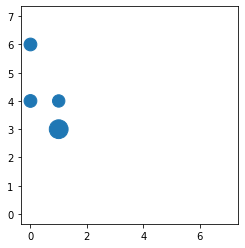

run 160  eventCount= 46  (orange: TOA tagged)


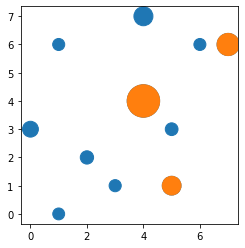

run 160  eventCount= 47  (orange: TOA tagged)


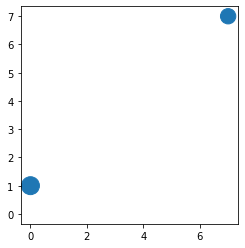

run 160  eventCount= 48  (orange: TOA tagged)


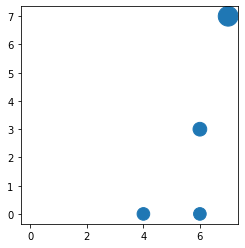

run 160  eventCount= 49  (orange: TOA tagged)


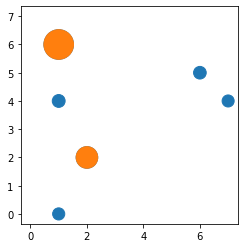

run 160  eventCount= 50  (orange: TOA tagged)


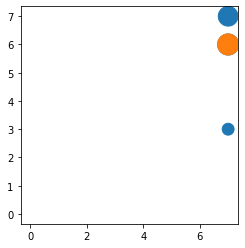

run 160  eventCount= 51  (orange: TOA tagged)


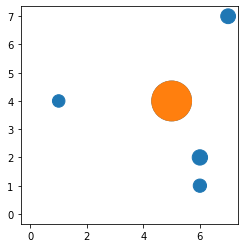

run 160  eventCount= 52  (orange: TOA tagged)


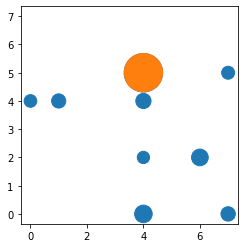

run 160  eventCount= 54  (orange: TOA tagged)


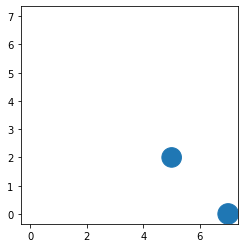

run 160  eventCount= 55  (orange: TOA tagged)


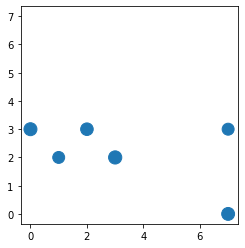

run 160  eventCount= 56  (orange: TOA tagged)


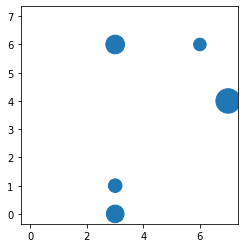

run 160  eventCount= 57  (orange: TOA tagged)


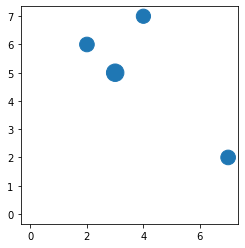

run 160  eventCount= 58  (orange: TOA tagged)


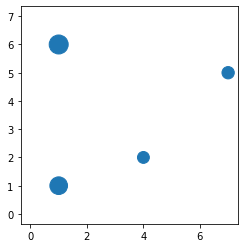

run 160  eventCount= 59  (orange: TOA tagged)


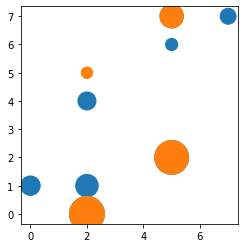

run 160  eventCount= 60  (orange: TOA tagged)


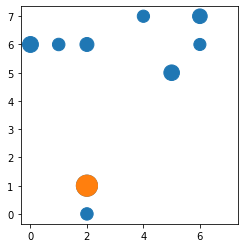

run 160  eventCount= 61  (orange: TOA tagged)


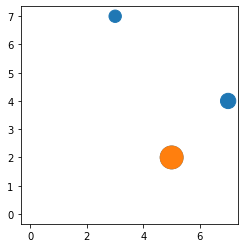

run 160  eventCount= 62  (orange: TOA tagged)


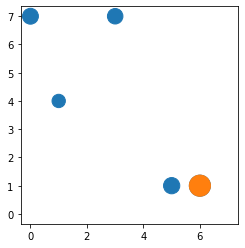

run 160  eventCount= 64  (orange: TOA tagged)


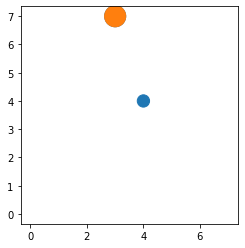

run 160  eventCount= 65  (orange: TOA tagged)


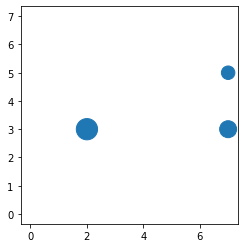

run 160  eventCount= 66  (orange: TOA tagged)


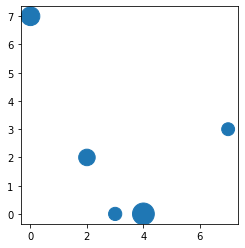

run 160  eventCount= 68  (orange: TOA tagged)


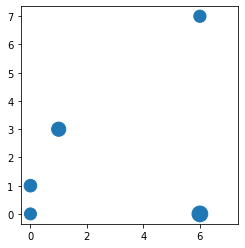

run 160  eventCount= 69  (orange: TOA tagged)


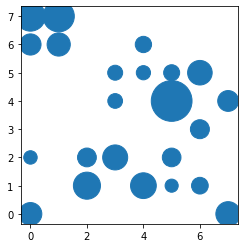

run 160  eventCount= 70  (orange: TOA tagged)


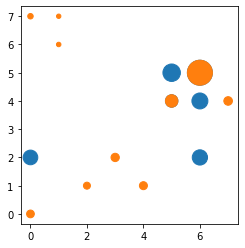

run 160  eventCount= 71  (orange: TOA tagged)


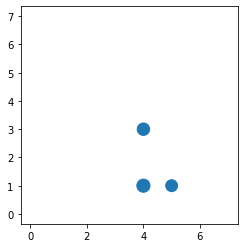

run 160  eventCount= 73  (orange: TOA tagged)


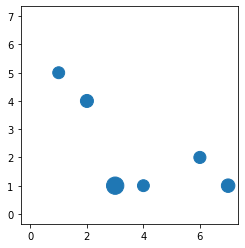

run 160  eventCount= 74  (orange: TOA tagged)


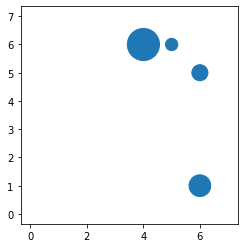

run 160  eventCount= 75  (orange: TOA tagged)


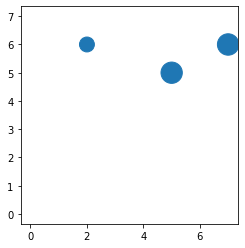

run 160  eventCount= 76  (orange: TOA tagged)


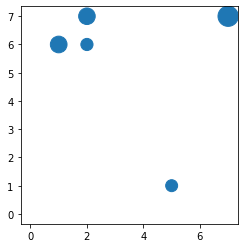

run 160  eventCount= 77  (orange: TOA tagged)


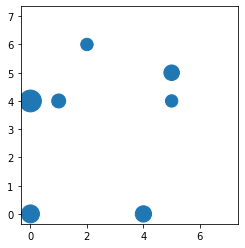

run 160  eventCount= 78  (orange: TOA tagged)


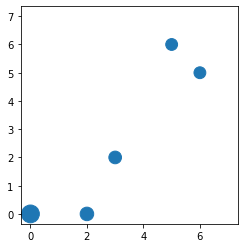

run 160  eventCount= 79  (orange: TOA tagged)


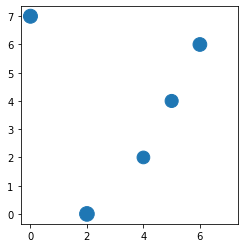

run 160  eventCount= 80  (orange: TOA tagged)


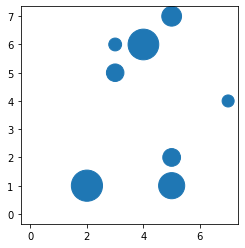

run 160  eventCount= 81  (orange: TOA tagged)


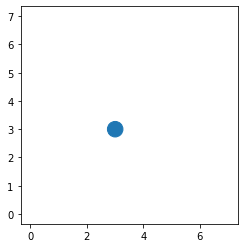

run 160  eventCount= 82  (orange: TOA tagged)


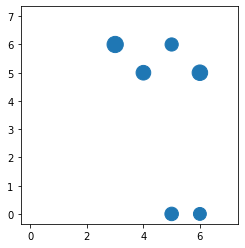

run 160  eventCount= 83  (orange: TOA tagged)


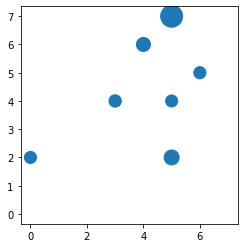

run 160  eventCount= 84  (orange: TOA tagged)


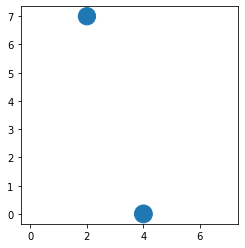

run 160  eventCount= 86  (orange: TOA tagged)


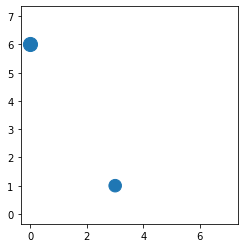

run 160  eventCount= 87  (orange: TOA tagged)


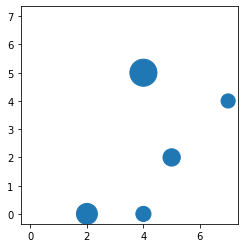

run 160  eventCount= 88  (orange: TOA tagged)


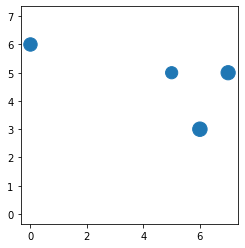

run 160  eventCount= 89  (orange: TOA tagged)


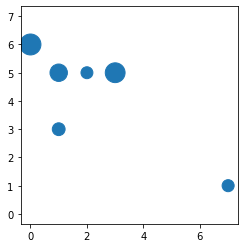

run 160  eventCount= 90  (orange: TOA tagged)


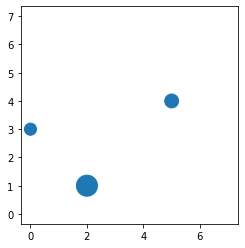

run 160  eventCount= 91  (orange: TOA tagged)


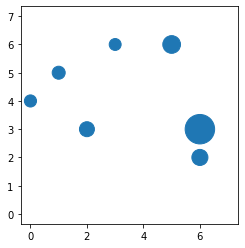

run 160  eventCount= 92  (orange: TOA tagged)


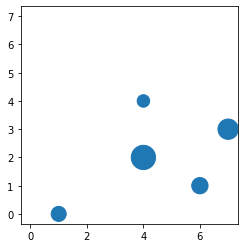

run 160  eventCount= 93  (orange: TOA tagged)


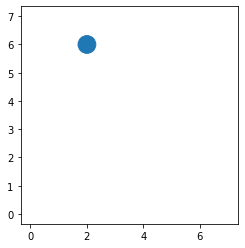

run 160  eventCount= 94  (orange: TOA tagged)


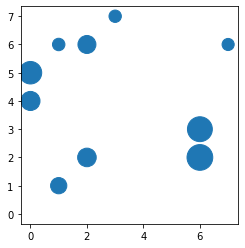

run 160  eventCount= 95  (orange: TOA tagged)


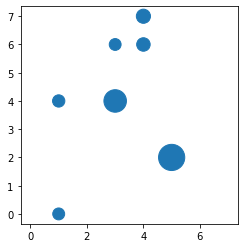

run 160  eventCount= 97  (orange: TOA tagged)


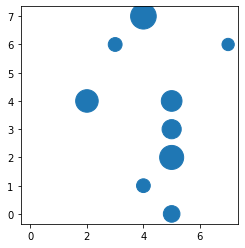

run 160  eventCount= 98  (orange: TOA tagged)


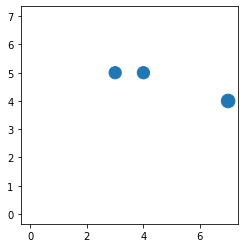

run 160  eventCount= 99  (orange: TOA tagged)


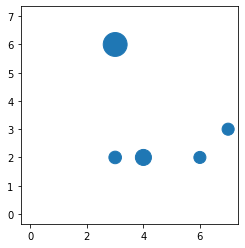

run 160  eventCount= 100  (orange: TOA tagged)


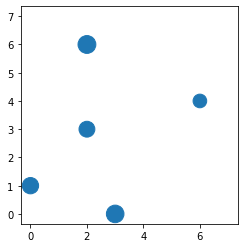

run 160  eventCount= 101  (orange: TOA tagged)


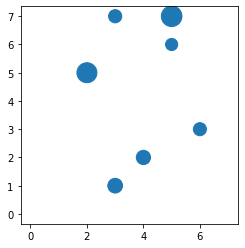

run 160  eventCount= 102  (orange: TOA tagged)


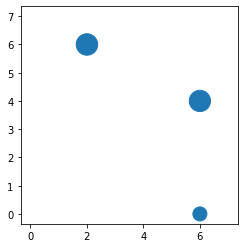

run 160  eventCount= 103  (orange: TOA tagged)


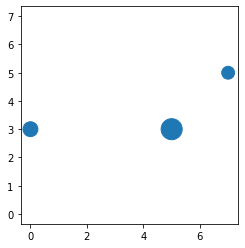

run 160  eventCount= 104  (orange: TOA tagged)


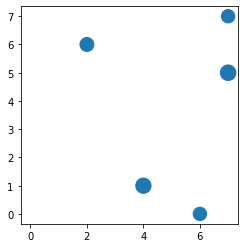

run 160  eventCount= 105  (orange: TOA tagged)


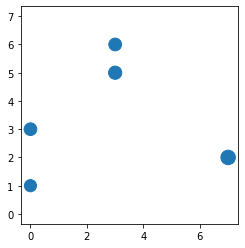

run 160  eventCount= 106  (orange: TOA tagged)


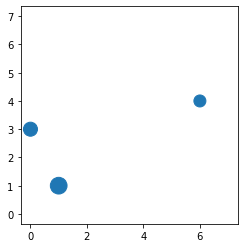

run 160  eventCount= 107  (orange: TOA tagged)


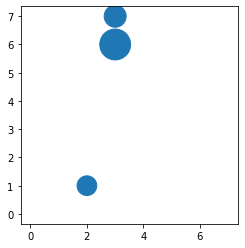

run 160  eventCount= 108  (orange: TOA tagged)


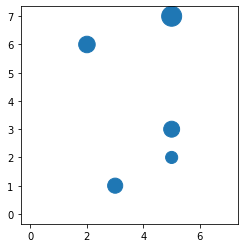

run 160  eventCount= 109  (orange: TOA tagged)


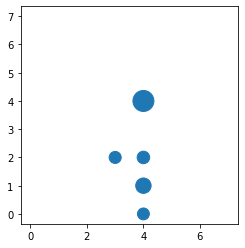

run 160  eventCount= 110  (orange: TOA tagged)


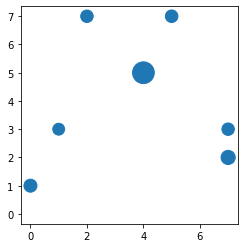

Run 160 ,   136  events have been analyzed.
start analyzing Run 161
/Users/kunori/skdir/CAEN/dfiles/MuonTestStand/Run161_list.csv
run 161  eventCount= 1  (orange: TOA tagged)


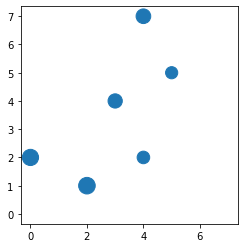

eventCount 6   nTotal= 2
DeltaTOA:    0.0 toa   92.0   92.0 kx  4
hg:      691.0  652.0    (ped not subtracted)
TOT:      38.0   32.0
hg/TOT:     16.87  18.81   (assume hg ped 50)
run 161  eventCount= 6  (orange: TOA tagged)


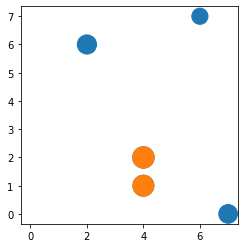

run 161  eventCount= 7  (orange: TOA tagged)


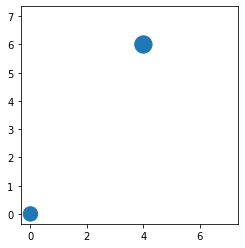

run 161  eventCount= 8  (orange: TOA tagged)


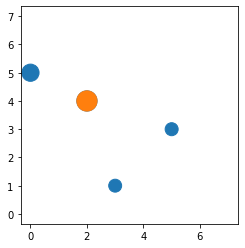

run 161  eventCount= 9  (orange: TOA tagged)


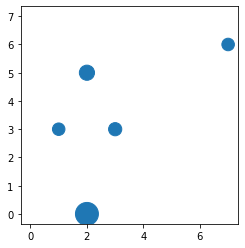

run 161  eventCount= 11  (orange: TOA tagged)


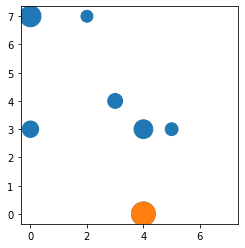

run 161  eventCount= 12  (orange: TOA tagged)


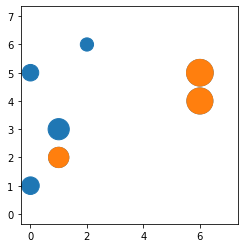

run 161  eventCount= 14  (orange: TOA tagged)


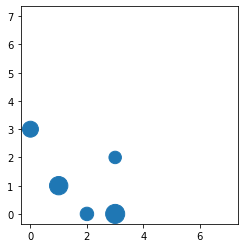

run 161  eventCount= 15  (orange: TOA tagged)


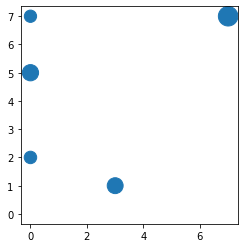

run 161  eventCount= 16  (orange: TOA tagged)


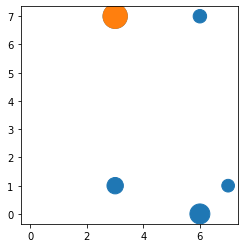

run 161  eventCount= 17  (orange: TOA tagged)


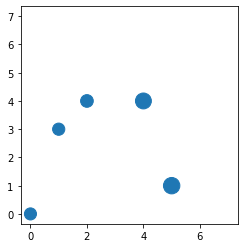

run 161  eventCount= 18  (orange: TOA tagged)


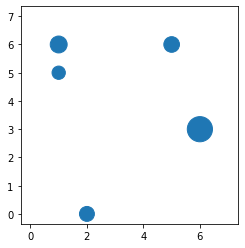

run 161  eventCount= 19  (orange: TOA tagged)


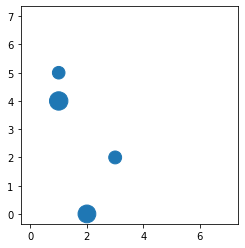

run 161  eventCount= 20  (orange: TOA tagged)


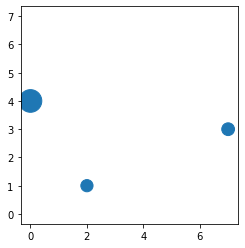

run 161  eventCount= 21  (orange: TOA tagged)


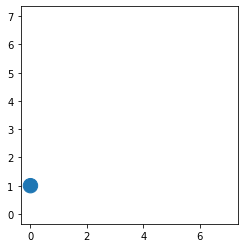

run 161  eventCount= 22  (orange: TOA tagged)


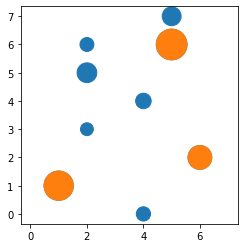

run 161  eventCount= 24  (orange: TOA tagged)


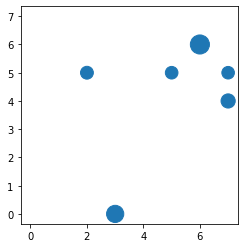

run 161  eventCount= 25  (orange: TOA tagged)


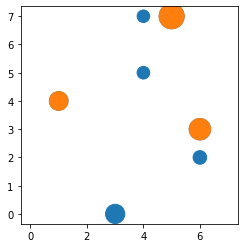

run 161  eventCount= 26  (orange: TOA tagged)


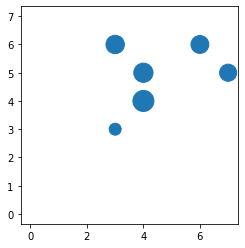

run 161  eventCount= 27  (orange: TOA tagged)


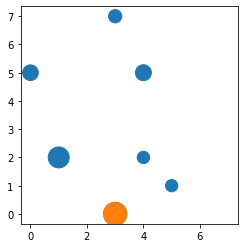

run 161  eventCount= 28  (orange: TOA tagged)


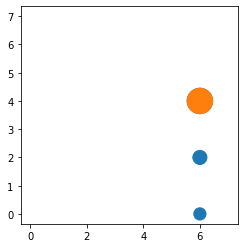

run 161  eventCount= 29  (orange: TOA tagged)


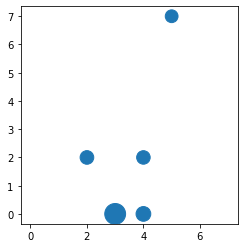

run 161  eventCount= 30  (orange: TOA tagged)


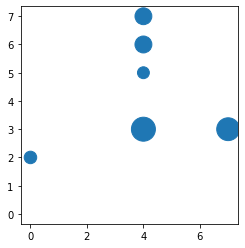

run 161  eventCount= 31  (orange: TOA tagged)


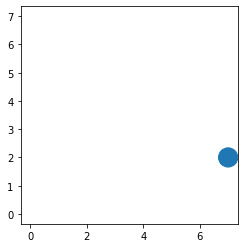

run 161  eventCount= 33  (orange: TOA tagged)


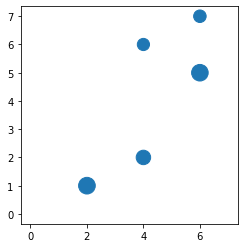

run 161  eventCount= 34  (orange: TOA tagged)


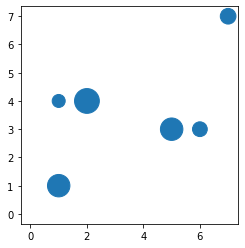

run 161  eventCount= 35  (orange: TOA tagged)


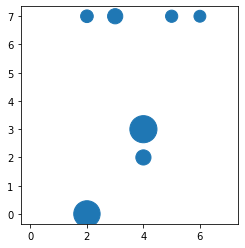

run 161  eventCount= 36  (orange: TOA tagged)


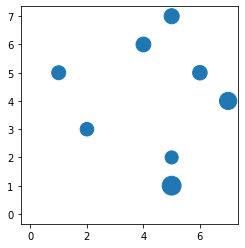

run 161  eventCount= 37  (orange: TOA tagged)


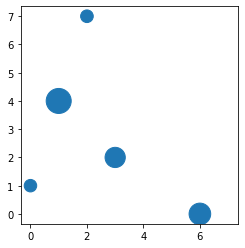

run 161  eventCount= 38  (orange: TOA tagged)


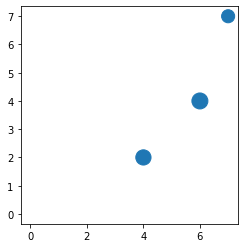

run 161  eventCount= 39  (orange: TOA tagged)


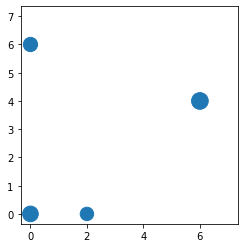

run 161  eventCount= 40  (orange: TOA tagged)


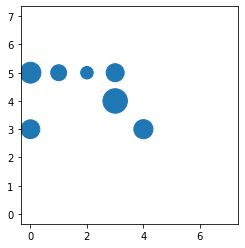

run 161  eventCount= 41  (orange: TOA tagged)


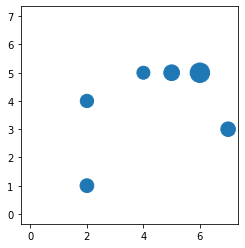

run 161  eventCount= 42  (orange: TOA tagged)


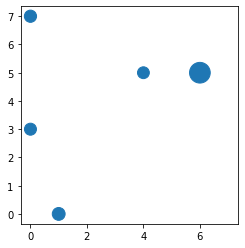

run 161  eventCount= 43  (orange: TOA tagged)


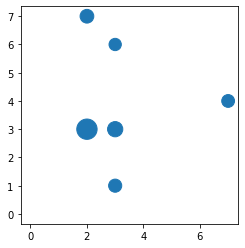

run 161  eventCount= 45  (orange: TOA tagged)


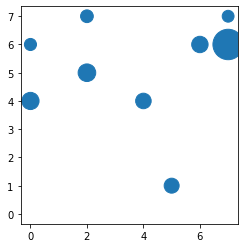

run 161  eventCount= 46  (orange: TOA tagged)


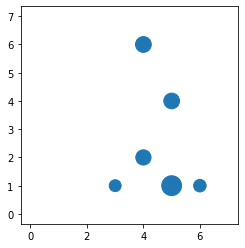

run 161  eventCount= 47  (orange: TOA tagged)


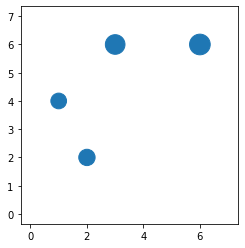

run 161  eventCount= 48  (orange: TOA tagged)


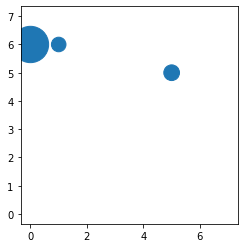

run 161  eventCount= 49  (orange: TOA tagged)


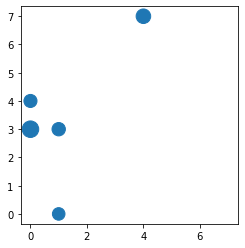

run 161  eventCount= 50  (orange: TOA tagged)


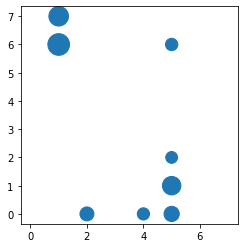

run 161  eventCount= 51  (orange: TOA tagged)


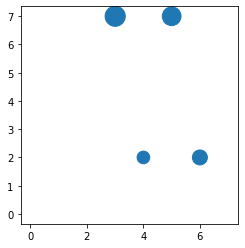

run 161  eventCount= 52  (orange: TOA tagged)


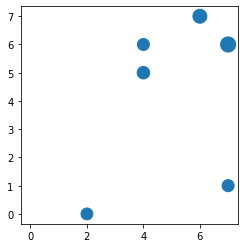

run 161  eventCount= 53  (orange: TOA tagged)


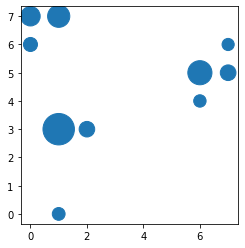

run 161  eventCount= 54  (orange: TOA tagged)


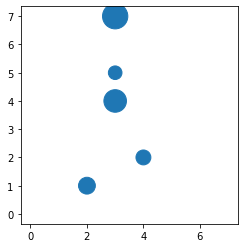

run 161  eventCount= 55  (orange: TOA tagged)


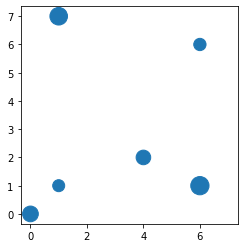

run 161  eventCount= 56  (orange: TOA tagged)


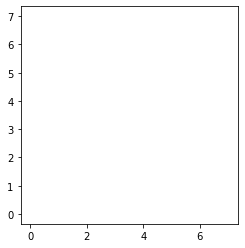

run 161  eventCount= 57  (orange: TOA tagged)


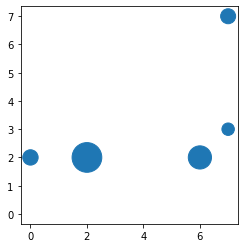

run 161  eventCount= 58  (orange: TOA tagged)


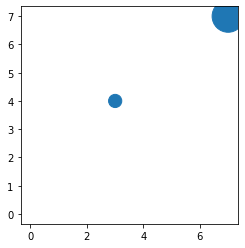

run 161  eventCount= 59  (orange: TOA tagged)


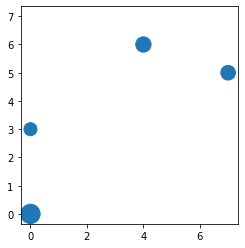

run 161  eventCount= 60  (orange: TOA tagged)


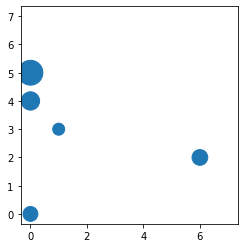

run 161  eventCount= 61  (orange: TOA tagged)


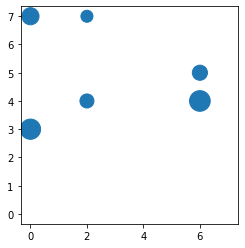

run 161  eventCount= 63  (orange: TOA tagged)


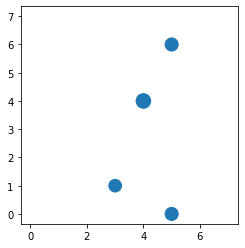

run 161  eventCount= 64  (orange: TOA tagged)


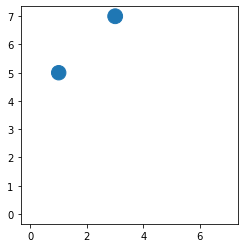

run 161  eventCount= 66  (orange: TOA tagged)


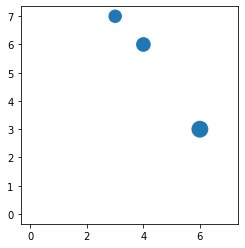

run 161  eventCount= 67  (orange: TOA tagged)


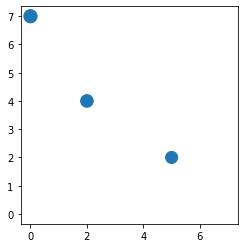

run 161  eventCount= 68  (orange: TOA tagged)


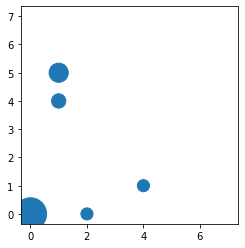

run 161  eventCount= 69  (orange: TOA tagged)


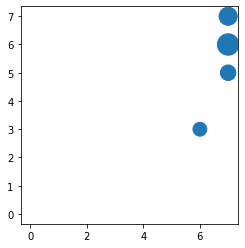

run 161  eventCount= 70  (orange: TOA tagged)


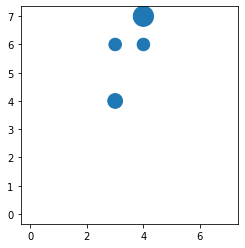

run 161  eventCount= 71  (orange: TOA tagged)


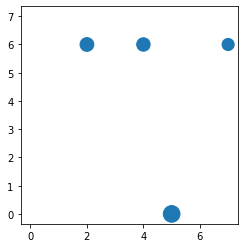

run 161  eventCount= 72  (orange: TOA tagged)


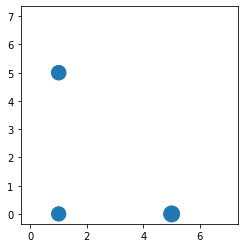

run 161  eventCount= 73  (orange: TOA tagged)


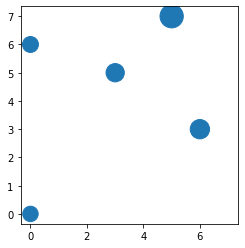

run 161  eventCount= 74  (orange: TOA tagged)


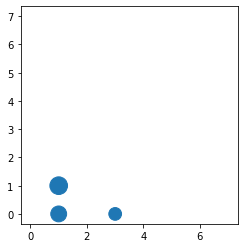

run 161  eventCount= 75  (orange: TOA tagged)


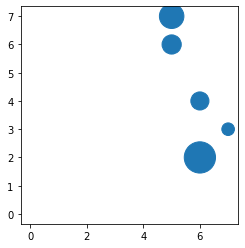

run 161  eventCount= 76  (orange: TOA tagged)


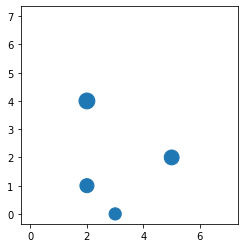

run 161  eventCount= 78  (orange: TOA tagged)


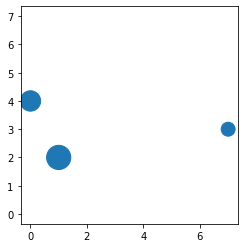

run 161  eventCount= 79  (orange: TOA tagged)


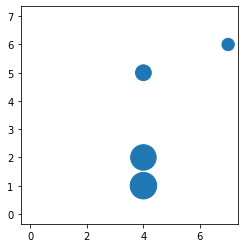

run 161  eventCount= 80  (orange: TOA tagged)


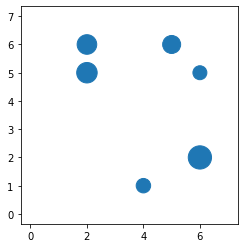

run 161  eventCount= 81  (orange: TOA tagged)


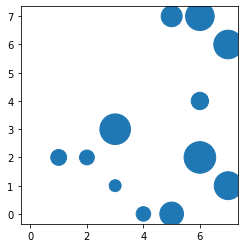

run 161  eventCount= 82  (orange: TOA tagged)


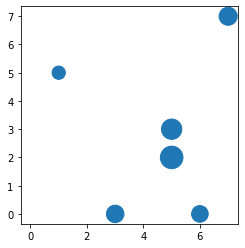

run 161  eventCount= 83  (orange: TOA tagged)


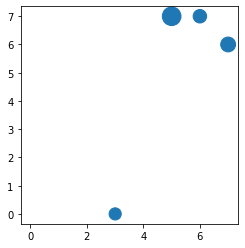

run 161  eventCount= 84  (orange: TOA tagged)


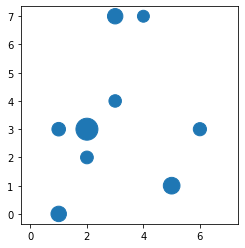

run 161  eventCount= 85  (orange: TOA tagged)


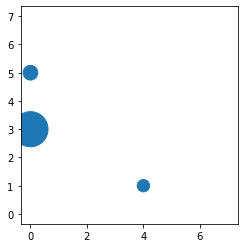

run 161  eventCount= 86  (orange: TOA tagged)


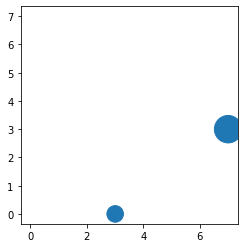

run 161  eventCount= 87  (orange: TOA tagged)


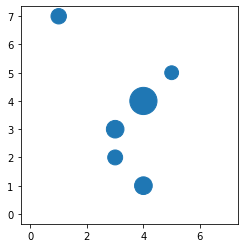

run 161  eventCount= 88  (orange: TOA tagged)


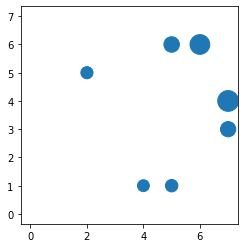

run 161  eventCount= 89  (orange: TOA tagged)


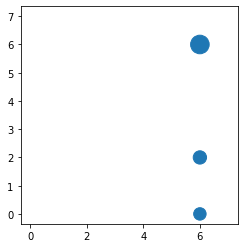

run 161  eventCount= 90  (orange: TOA tagged)


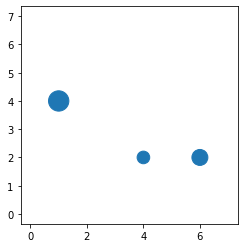

run 161  eventCount= 91  (orange: TOA tagged)


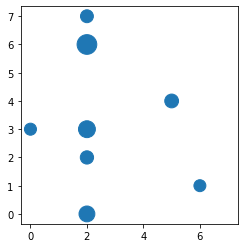

run 161  eventCount= 92  (orange: TOA tagged)


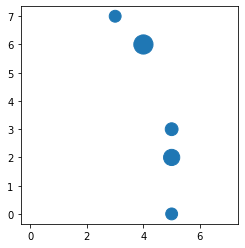

run 161  eventCount= 93  (orange: TOA tagged)


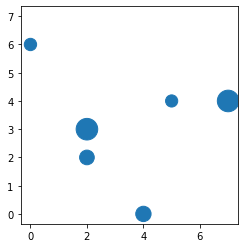

run 161  eventCount= 94  (orange: TOA tagged)


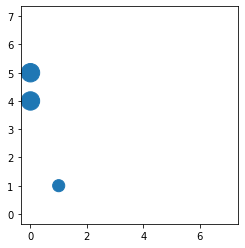

run 161  eventCount= 95  (orange: TOA tagged)


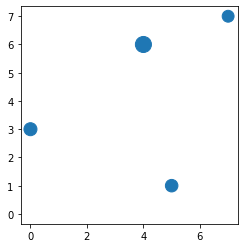

run 161  eventCount= 96  (orange: TOA tagged)


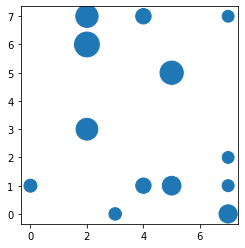

run 161  eventCount= 98  (orange: TOA tagged)


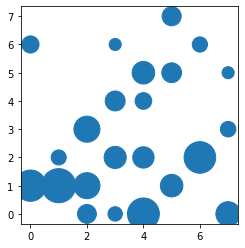

run 161  eventCount= 99  (orange: TOA tagged)


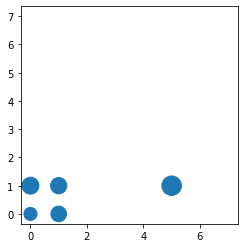

run 161  eventCount= 100  (orange: TOA tagged)


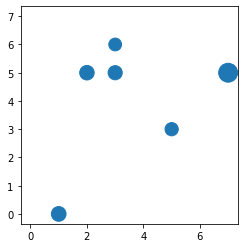

run 161  eventCount= 101  (orange: TOA tagged)


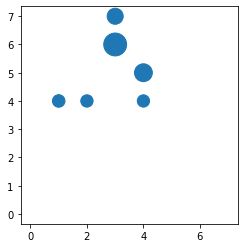

run 161  eventCount= 102  (orange: TOA tagged)


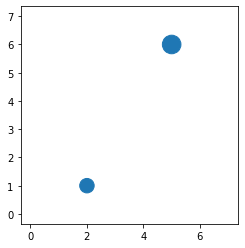

run 161  eventCount= 103  (orange: TOA tagged)


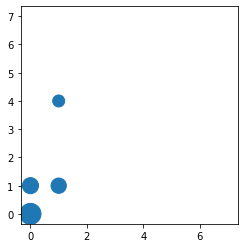

run 161  eventCount= 104  (orange: TOA tagged)


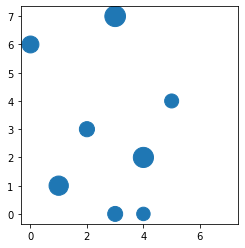

run 161  eventCount= 105  (orange: TOA tagged)


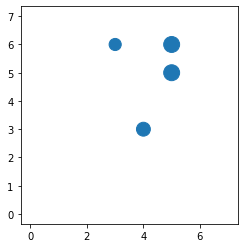

run 161  eventCount= 106  (orange: TOA tagged)


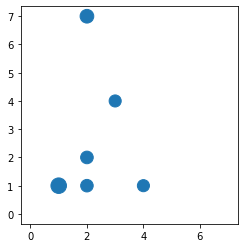

run 161  eventCount= 107  (orange: TOA tagged)


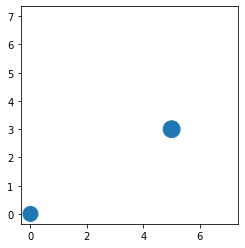

run 161  eventCount= 108  (orange: TOA tagged)


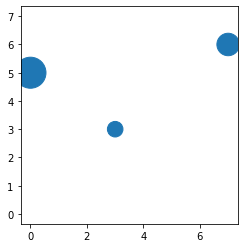

run 161  eventCount= 109  (orange: TOA tagged)


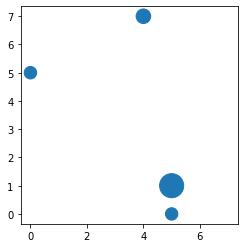

run 161  eventCount= 110  (orange: TOA tagged)


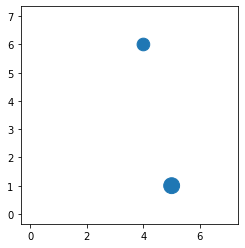

run 161  eventCount= 111  (orange: TOA tagged)


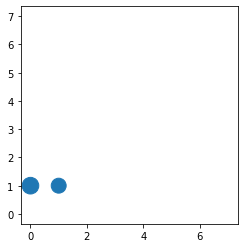

run 161  eventCount= 113  (orange: TOA tagged)


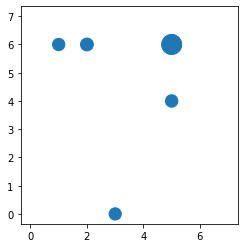

run 161  eventCount= 114  (orange: TOA tagged)


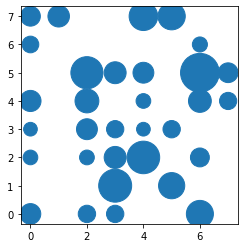

Run 161 ,   130  events have been analyzed.

 Total events in this job 266
for runs [160 161]


Warning in <TFile::Append>: Replacing existing TH1: nHG1pe (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: toa_2hits (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: toa_2hits_deltaT (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HG_2hits (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HGoverTOT_2hits (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HGvsTOT_2hits (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: toa_2hits (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: toa_2hits_deltaT (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HG_2hits (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HGoverTOT_2hits (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HGvsTOT_2hits (Potential memory leak).
Warning in <TF

In [4]:
displayDone=0


oname="histMuonAnalysis_Run"+str(runlist[0])+".root"
ofile=ROOT.TFile(oname,"RECREATE")

def displayHits(run,eventCount,HG,TOA):
    global displayDone

    if displayDone>0:
        return
    displayDone=1   # set flag to avoid same event displayed multiple times.
    
    HGtemp=np.copy(HG)
    HGtemp[HGtemp>3500.0]=0.0
    HGtemp[HGtemp<140.0]=0.0   # v1=140
    HGmax=np.amax(HGtemp)
            
    HGtempTOA=np.copy(HG)
    for i in np.arange(0,64,1):
        if TOA[i]<0.1 or TOA[i]>50000.0:
            HGtempTOA[i]=0.0  # reset value if TOA does no exist
    HGmaxTOA=np.amax(HGtempTOA)
    
    x=np.zeros(64)
    y=np.zeros(64)
    z=np.zeros(64)
    ztoa=np.zeros(64)
    for i in range(0,64):
        j=caen2xy[i]
        kx=int(j%8)
        ky=int(j/8)
        x[i]=float(kx)
        y[i]=float(ky)
        if HGtemp[i]<2000.0:
            z[i]=HGtemp[i] 
        if HGtempTOA[i]<2000.0:
            ztoa[i]=HGtempTOA[i]
    print("run",run," eventCount=",eventCount," (orange: TOA tagged)")
    plt.scatter(x,y,z)
    plt.scatter(x,y,ztoa)
    plt.gca().set_aspect('equal')
    plt.show()
    return

def defineHistograms():
    global ofile
    global h1,h2,hp
    
    s="ChID"
    h1[s]=ROOT.TH1D(s,s,64,0.0,64.0)
    
    s="ChID_dtype3"
    h1[s]=ROOT.TH1D(s,s,64,0.0,64.0)
    
    for run in runlist:
        s="EventID_dtype3_Run"+str(run)
        h1[s]=ROOT.TH1D(s,s,500,0.0,500.0)

    s="data_type_all"
    h1[s]=ROOT.TH1D(s,s,5,0.0,5.0)
    
    s="data_type_max"
    h1[s]=ROOT.TH1D(s,s,5,0.0,5.0)
    
    s="LG_all"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
    s="a_LG_all"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
    
    s="LG_all_dtype3"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
    s="a_LG_all_dtype3"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
    
    s="LG_max"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)    
    s="a_LG_max"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)

    s="HG_all"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
    s="a_HG_all"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
    
    s="HG_all_dtype3"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
    s="a_HG_all_dtype3"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
    
    s="HG_all_in_dtype3_event"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
    s="a_HG_all_in_dtype3_event"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
    
    s="HG_max"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)    
    s="a_HG_max"
    h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
    
    s="nHG1pe"
    h1[s]=ROOT.TH1D(s,s,20,0.0,20.0)
    
    s="nHG1pe"
    h1[s]=ROOT.TH1D(s,s,20,0.0,20.0)
    
    s="toa_all"
    h1[s]=ROOT.TH1D(s,s,1100,0.0,1100.0)
    s="a_toa_all"
    h1[s]=ROOT.TH1D(s,s,100,0.0,100.0)
    
    s="tot_all"
    h1[s]=ROOT.TH1D(s,s,1100,0.00,1100.0)
    s="a_tot_all"
    h1[s]=ROOT.TH1D(s,s,200,0.00,200.0)

    for i in range(64):
        
        s="LG_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
        s="HG_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0) 
        s="toa_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
        s="tot_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,5000.0)
        
        s="a_LG_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
        s="a_HG_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0) 
        s="a_toa_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
        s="a_tot_"+str(i)
        h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0) 
        
        #
        #  for AnalyzeTOA
        #
        
        s="toa_2hits"        
        h1[s]=ROOT.TH1D(s,s,100,0.0,100.0)
        s="toa_2hits_deltaT"        
        h1[s]=ROOT.TH1D(s,s,100,-50.0,50.0)
        s="HG_2hits"        
        h1[s]=ROOT.TH1D(s,s,1000,0.0,1000.0)
        s="HGoverTOT_2hits"        
        h1[s]=ROOT.TH1D(s,s,100,0.0,50.0)
        
        s="HGvsTOT_2hits"        
        h2[s]=ROOT.TH2D(s,s,100,0.0,1000.0,100,0.0,100.0)
    return

#   define all histograms here.
defineHistograms()

def analyzeTOA(run,eventCount,LG,HG,TOA,TOT,data_type):
    global h1,h2,hp

    tempTOA=np.copy(TOA)
    toaMax=np.amax(TOA)
    if toaMax < 1.0:        # skip event without TOA
        return
    
    nIX=np.zeros(8,dtype=int)
    toaIX=np.zeros((8,8))
    hgIX=np.zeros((8,8))
    totIX=np.zeros((8,8))
    for i in range(0,64):
        j=caen2xy[i]
        kx=int(j%8)
        ky=int(j/8)
        if tempTOA[i]>1.0:
            # print("eventCount",eventCount,"kx",kx,"ky",ky,tempTOA[i])
            toaIX[nIX[kx],kx]=tempTOA[i]
            hgIX[nIX[kx],kx]=HG[i]
            totIX[nIX[kx],kx]=TOT[i]
            nIX[kx]=nIX[kx]+1
    
    nTotal=np.sum(nIX)
    # print("eventCount",eventCount,"  nTotal=",nTotal)
    
    if nTotal == 2:
        for kx in range(0,8):   
            if(nIX[kx]==2):
                print("eventCount",eventCount,"  nTotal=",nTotal)
                delta=toaIX[0,kx]-toaIX[1,kx]
                print("DeltaTOA: {:6.1f} toa {:6.1f} {:6.1f} kx {:2d}"
                      .format(delta,toaIX[0,kx],toaIX[1,kx],kx))
                print("hg:     {:6.1f} {:6.1f}    (ped not subtracted)"
                      .format(hgIX[0,kx],hgIX[1,kx]))
                print("TOT:    {:6.1f} {:6.1f}"
                      .format(totIX[0,kx],totIX[1,kx]))
                r0=(hgIX[0,kx]-50.0)/totIX[0,kx]   # 50 as a crude pedestal value
                r1=(hgIX[1,kx]-50.0)/totIX[1,kx]
                print("hg/TOT:    {:6.2f} {:6.2f}   (assume hg ped 50)"
                      .format(r0,r1))
                s="toa_2hits"        
                h1[s].Fill(toaIX[0,kx])
                h1[s].Fill(toaIX[1,kx])
                s="toa_2hits_deltaT"        
                h1[s].Fill(delta)
                s="HG_2hits"        
                h1[s].Fill(hgIX[0,kx])
                h1[s].Fill(hgIX[1,kx])
                s="HGoverTOT_2hits"        
                h1[s].Fill(r0)
                h1[s].Fill(r1)
                s="HGvsTOT_2hits" 
                h2[s].Fill(hgIX[0,kx]-50.0,totIX[0,kx])
                h2[s].Fill(hgIX[1,kx]-50.0,totIX[1,kx])
                # displayHits(run,eventCount,HG,TOA)   #   display hits
        
    return

def fillHistograms(run,eventCount,LG,HG,TOA,TOT,data_type):
    global h1,h2,hp
    
    lgtemp=np.copy(HG)
    lgtemp[lgtemp>4000.0]=0.0
    lgtemp[lgtemp<1.0]=0.0
    lgmax=np.amax(lgtemp)
    h1["LG_max"].Fill(lgmax)
    h1["a_LG_max"].Fill(lgmax)
    
    
    hgtemp=np.copy(HG)
    hgtemp[hgtemp>4000.0]=0.0
    hgtemp[hgtemp<140.0]=0.0
    hgmax=np.amax(hgtemp)
    h1["HG_max"].Fill(hgmax)
    h1["a_HG_max"].Fill(hgmax)
    
    datatypemax=np.amax(data_type)
    h1["data_type_max"].Fill(datatypemax)
    
    if datatypemax==3:
        s="EventID_dtype3_Run"+str(run)
        h1[s].Fill(eventCount)
    
    nHG1pe=0
    for i in range(0,64):
        h1["data_type_all"].Fill(data_type[i])
        if data_type[i]==3:
            h1["ChID_dtype3"].Fill(i)

        h1["LG_all"].Fill(LG[i])
        h1["a_LG_all"].Fill(LG[i]) 
        if data_type[i]==3:
            h1["LG_all_dtype3"].Fill(LG[i])
            h1["a_LG_all_dtype3"].Fill(LG[i])
        
        h1["HG_all"].Fill(HG[i])
        h1["a_HG_all"].Fill(HG[i])
        
        if HG[i]>120.0 and HG[i]<220.0:
            nHG1pe=nHG1pe+1
            
        if data_type[i]==3:
            h1["HG_all_dtype3"].Fill(HG[i])
            h1["a_HG_all_dtype3"].Fill(HG[i])
        if datatypemax==3:
            h1["HG_all_in_dtype3_event"].Fill(HG[i])
            h1["a_HG_all_in_dtype3_event"].Fill(HG[i])
        s="HG_"+str(i)
        h1[s].Fill(HG[i])
        s="a_HG_"+str(i)
        h1[s].Fill(HG[i])
        
        if TOA[i]>0.0:      
            h1["toa_all"].Fill(TOA[i])
            h1["a_toa_all"].Fill(TOA[i])
            s="toa_"+str(i)
            h1[s].Fill(TOA[i])
            s="a_toa_"+str(i)
            h1[s].Fill(TOA[i])

        if TOT[i]>0.0:
            h1["tot_all"].Fill(TOT[i])
            h1["a_tot_all"].Fill(TOT[i])
            s="tot_"+str(i)
            h1[s].Fill(TOT[i])
            s="a_tot_"+str(i)
            h1[s].Fill(TOT[i])
            
    h1["nHG1pe"].Fill(nHG1pe)
        
    #  return to caller.
    return
    


def analyzeRun(run):
    global displayDone
    global lastEventCount
    
    nhitDisplayMax=100
    nhitDisplay=0
    
    csvname=csvdir+"Run"+str(run)+"_list.csv"
    print("start analyzing Run",run)
    print(csvname)
    
    eventCount=0
    with open(csvname,"r") as csvfile:
        reader=csv.reader(csvfile)
        for ix, row in enumerate(reader):
            displayDone=0
            # print(ix,"  ",row)
            if ix<5:
                continue
                
            if ix>10000000:
                break
            eventCount=eventCount+1
            rtcode,TStamp,LG,HG,TOA,TOT,data_type=unpackData(row)
            if rtcode>0:
                print("return code from unpackData is ",rtcode," Abort this job.")
                break

            fillHistograms(run,eventCount,LG,HG,TOA,TOT,data_type)
            analyzeTOA(run,eventCount,LG,HG,TOA,TOT,data_type)
            
            hgtemp=np.copy(HG)
            hgtemp[hgtemp>3000.0]=0.0
            hgtemp[hgtemp<120]=0.0   # v1=140
            hgmax=np.amax(hgtemp)
            
            hgtempTOA=np.copy(HG)
            for i in np.arange(0,64,1):
                if TOA[i]<0.1 or TOA[i]>5000.0:
                    hgtempTOA[i]=0.0  # reset valu if TOA does no exist
            hgmaxTOA=np.amax(hgtempTOA)

            # for i in np.arange(0,64,1):
            #    print(i,HG[i],TOA[i],hgtempTOA[i])
            
            # print("ix=",ix," hgmax=",hgmax)
            
            # if hgmaxTOA>-1.0 and nhitDisplay<nhitDisplayMax:
            if hgmax>250.0 and nhitDisplay<nhitDisplayMax:
                nhitDisplay=nhitDisplay+1
                displayHits(run,eventCount,LG,TOA)
    return eventCount
                
#  loop over all events to analyze.
nTotal=0
for ix,run in enumerate(runlist):
    eventCount= analyzeRun(run)
    runEventCount[ix]=eventCount
    nTotal=nTotal+eventCount
    print("Run",run,",  ",eventCount," events have been analyzed.")

    totalEventCount=nTotal
# write histograms to output root histogram file
print("\n Total events in this job",nTotal)
print("for runs",runlist)
#  ofile.Write()

# 8x8 display shows hits with amplitude > 120 ( >= 1 pe)

run list: [160 161]
 number of events: [136. 130.]
total events= 266


Info in <TCanvas::Print>: pdf file plotdir/plotMTS_run160_01_eventIDvsTOA.pdf has been created


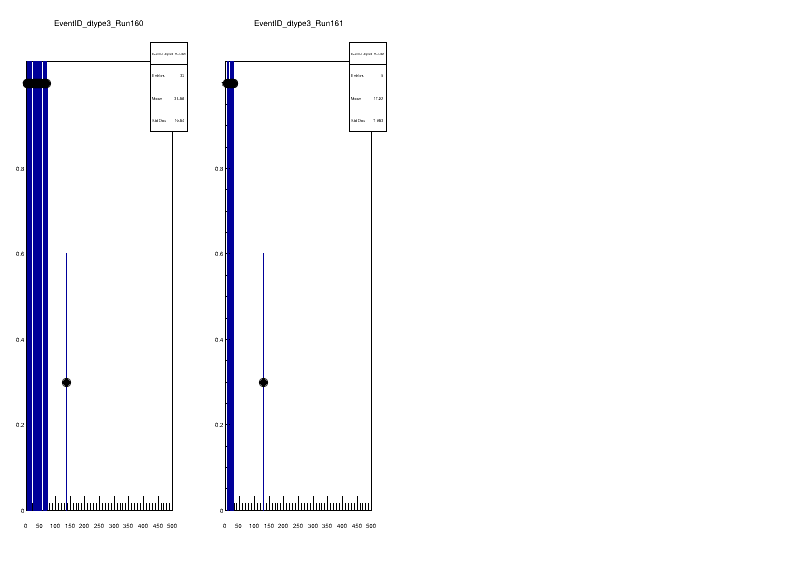

In [5]:
c11 = ROOT.TCanvas("c11","EventIDTOA",800,600)
nx=4
ny=int((len(runlist)-1)/nx)
ny=ny+1
c11.Divide(nx,ny)
print("run list:",runlist)
print(" number of events:",runEventCount)
print("total events=",totalEventCount)

for ix in range(len(runlist)):
    run=runlist[ix]
    k=ix+1
    c11.cd(k)
    s="EventID_dtype3_Run"+str(run)
    h1[s].Draw("")
    h1[s].SetMarkerStyle(0)
    
    ss="lastevent"+str(run)
    h1[ss]=h1[s].Clone(ss)
    h1[ss].Clear()
    x=float(runEventCount[ix])
    wt=float(0.3)
    h1[ss].Fill(x,wt)
    
    h1[ss].Draw("SAME")
    h1[ss].SetMarkerStyle(20)

c11.Draw()

pdfname=prepdf+"01_eventIDvsTOA"+postpdf
c11.SaveAs(pdfname)

Number of HG 1pe hits      3.22


Info in <TCanvas::Print>: pdf file plotdir/plotMTS_run160_02_deltaTOA.pdf has been created


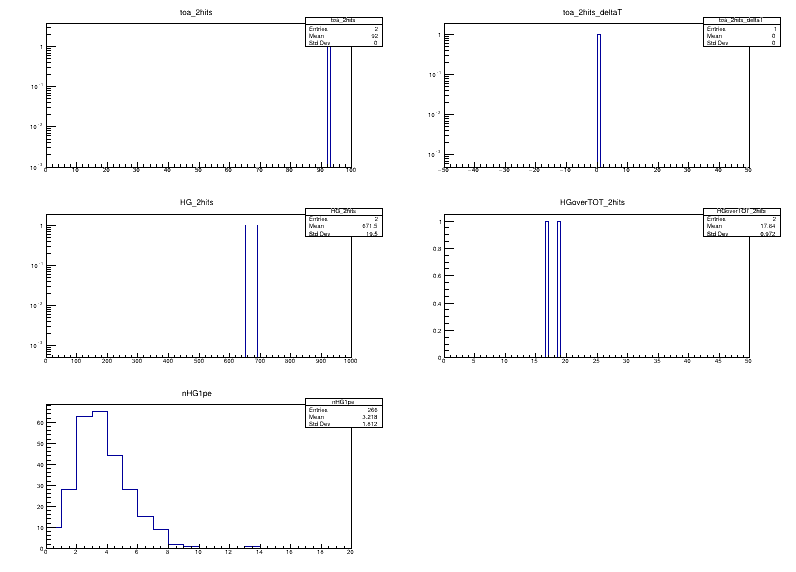

In [6]:
c10 = ROOT.TCanvas("c10","TOAanalysis",800,600)
c10.Divide(2,3)
c10.cd(1)
c10.GetPad(1).SetLogy()
h1["toa_2hits"].Draw()
c10.cd(2)
c10.GetPad(2).SetLogy()
h1["toa_2hits_deltaT"].Draw()

c10.cd(3)
c10.GetPad(3).SetLogy()
h1["HG_2hits"].Draw()
c10.cd(4)
# c10.GetPad(4).SetLogy()
h1["HGoverTOT_2hits"].Draw()
c10.cd(5)
# c10.GetPad(4).SetLogy()
h1["nHG1pe"].Draw()
c10.Draw()

pdfname=prepdf+"02_deltaTOA"+postpdf
c10.SaveAs(pdfname)

print("Number of HG 1pe hits  {:8.2f}".format(h1["nHG1pe"].GetMean()))

nEvents 266.0   nEventsTOA 41.0    nTOA/nTotal 0.15413533834586465
 nHG: >=1pe  6.586466165413534
 nHG (dtype3): >=1pe  7.634146341463414


Info in <TCanvas::Print>: pdf file plotdir/plotMTS_run160_02a_TOA_TOT.pdf has been created


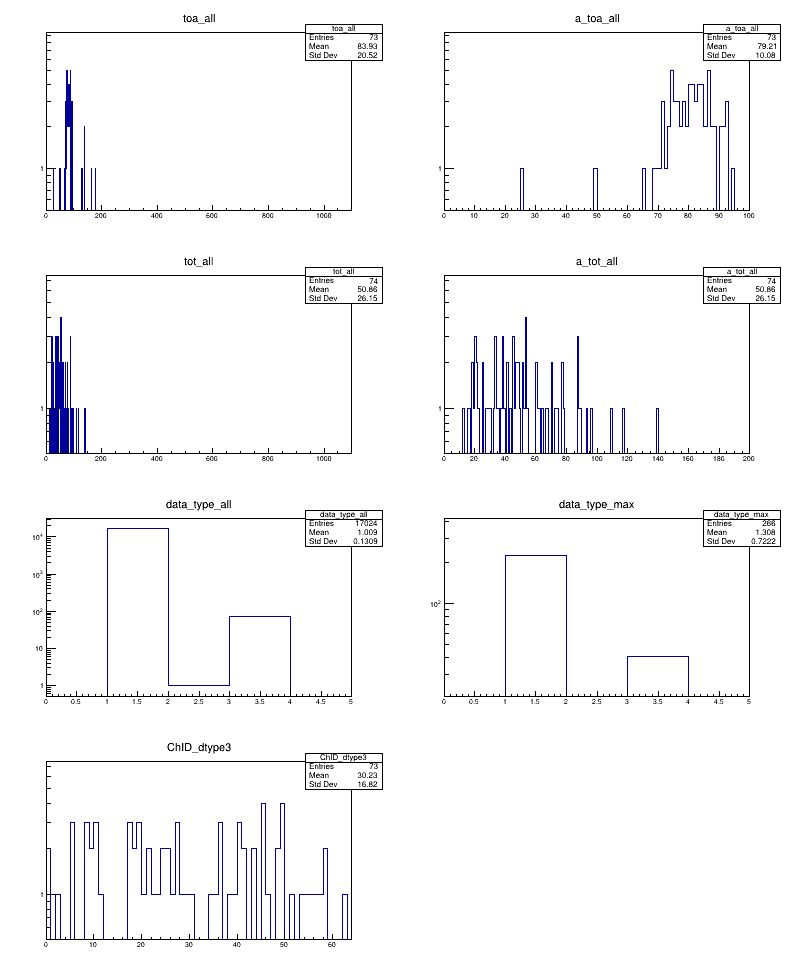

In [7]:
c2 = ROOT.TCanvas("c2","TOA",800,1000)

c2.Divide(2,4)
c2.cd(1)
c2.GetPad(1).SetLogy()
h1["toa_all"].Draw()
c2.cd(2)
c2.GetPad(2).SetLogy()
h1["a_toa_all"].Draw()
c2.cd(3)
c2.GetPad(3).SetLogy()
h1["tot_all"].Draw()
c2.cd(4)
c2.GetPad(4).SetLogy()
h1["a_tot_all"].Draw()
c2.cd(5)
c2.GetPad(5).SetLogy()
h1["data_type_all"].Draw()
c2.cd(6)
c2.GetPad(6).SetLogy()
h1["data_type_max"].Draw()
c2.cd(7)
c2.GetPad(7).SetLogy()
h1["ChID_dtype3"].Draw()
# c2.cd(8)
# c2.GetPad(8).SetLogy()
# h1["EventID_dtype3"].Draw()
c2.Draw()

nEvents=h1["data_type_max"].GetEntries()
nEventsTOA=h1["data_type_max"].GetBinContent(4)
print("nEvents",nEvents,"  nEventsTOA",nEventsTOA,"   nTOA/nTotal",nEventsTOA/nEvents)

nxbins=h1["a_HG_all"].GetNbinsX()
nhg1pe=0.0
for ix in np.arange(1,nxbins,1):
    xc=h1["a_HG_all"].GetBinCenter(int(ix))
    if xc > 100.0:
        nhg1pe=nhg1pe+h1["a_HG_all"].GetBinContent(int(ix))

nhg1pe_average=nhg1pe/float(nEvents)
print(" nHG: >=1pe ",nhg1pe_average)
        
nxbins=h1["a_HG_all_in_dtype3_event"].GetNbinsX()
nhg1pe_dtype2=0.0
for ix in np.arange(1,nxbins,1):
    xc=h1["a_HG_all_in_dtype3_event"].GetBinCenter(int(ix))
    if xc > 100.0:
        nhg1pe_dtype2=nhg1pe_dtype2+h1["a_HG_all_in_dtype3_event"].GetBinContent(int(ix))

nhg1pe_dtype2_average=nhg1pe_dtype2/float(nEventsTOA)
print(" nHG (dtype3): >=1pe ",nhg1pe_dtype2_average)


pdfname=prepdf+"02a_TOA_TOT"+postpdf
c2.SaveAs(pdfname)

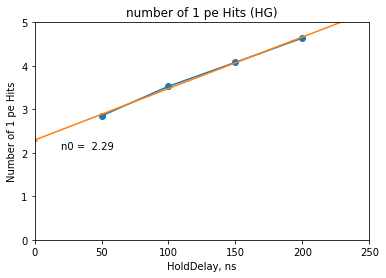

fit 0.011852000000000003 2.292999999999998


<Figure size 432x288 with 0 Axes>

In [8]:
xval=np.array([50.0,100.0,150.0,200.0])
yval=np.array([2.848,3.53,4.08,4.64])
m,b=np.polyfit(xval,yval,1)
xv2=np.array([0.0,250.])
yv2=np.array([b,b+m*250.])
plt.plot(xval,yval,'o-')
plt.plot(xv2,yv2,'.-')
plt.xlim(0.0,250.0)
plt.ylim(0.0,5.0)
s="n0 = {:5.2f}".format(b)
plt.text(20.0,b-0.2,s)
plt.title("number of 1 pe Hits (HG)")
plt.xlabel("HoldDelay, ns")
plt.ylabel("Number of 1 pe Hits")
plt.show()

pdfname=prepdf+"03_1peHitsvsHoldDelay"+postpdf
plt.savefig(pdfname)

print("fit",m,b)

Info in <TCanvas::Print>: pdf file plotdir/plotMTS_run160_04_HG_all.pdf has been created


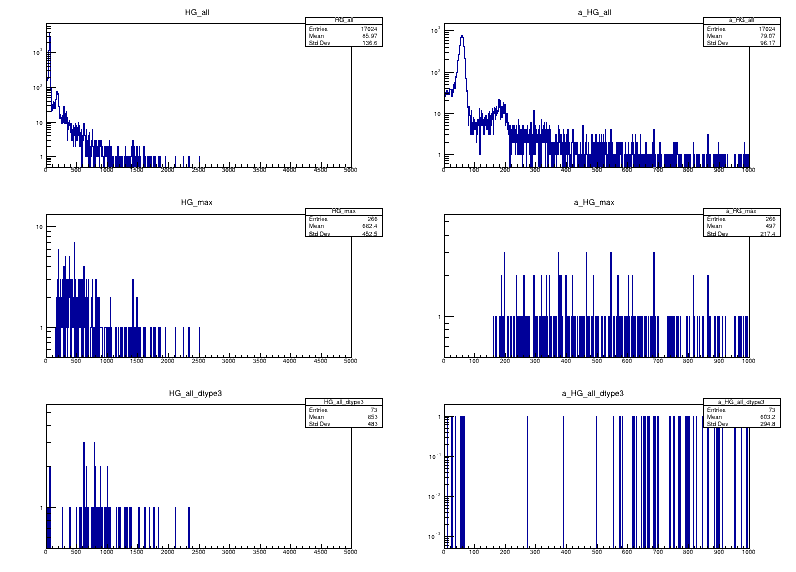

In [9]:
c0 = ROOT.TCanvas("c0","HGall",800,600)
c0.Divide(2,3)
c0.cd(1)
c0.GetPad(1).SetLogy()
h1["HG_all"].Draw()
c0.cd(2)
c0.GetPad(2).SetLogy()
h1["a_HG_all"].Draw()

c0.cd(3)
c0.GetPad(3).SetLogy()
h1["HG_max"].Draw()
c0.cd(4)
c0.GetPad(4).SetLogy()
h1["a_HG_max"].Draw()

c0.cd(5)
c0.GetPad(5).SetLogy()
h1["HG_all_dtype3"].Draw()
c0.cd(6)
c0.GetPad(6).SetLogy()
h1["a_HG_all_dtype3"].Draw()

c0.Draw()

pdfname=prepdf+"04_HG_all"+postpdf
c0.SaveAs(pdfname)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0
Info in <TCanvas::Print>: pdf file plotdir/plotMTS_run160_05_LG_all.pdf has been created


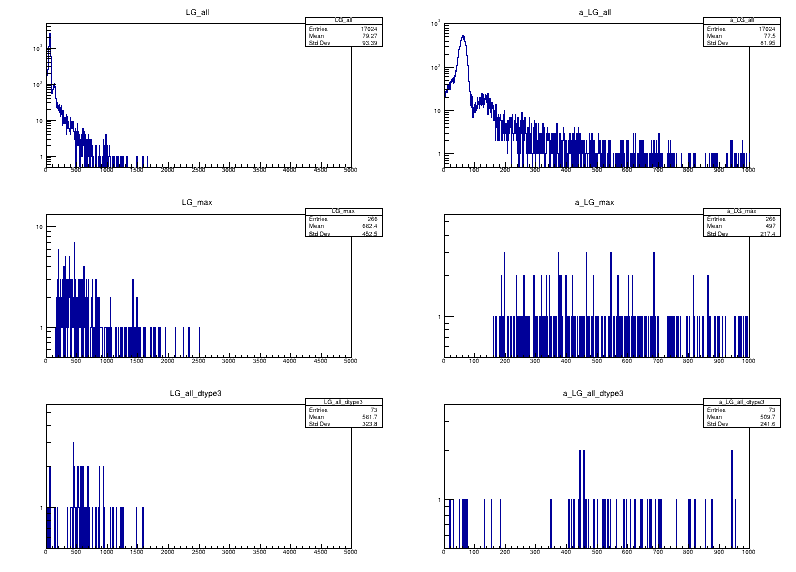

In [10]:
c0 = ROOT.TCanvas("c0","LGall",800,600)
c0.Divide(2,3)
c0.cd(1)
c0.GetPad(1).SetLogy()
h1["LG_all"].Draw()
c0.cd(2)
c0.GetPad(2).SetLogy()
h1["a_LG_all"].Draw()
c0.cd(3)
c0.GetPad(3).SetLogy()
h1["LG_max"].Draw()
c0.cd(4)
c0.GetPad(4).SetLogy()
h1["a_LG_max"].Draw()
c0.cd(5)
c0.GetPad(5).SetLogy()
h1["LG_all_dtype3"].Draw()
c0.cd(6)
c0.GetPad(6).SetLogy()
h1["a_LG_all_dtype3"].Draw()

c0.Draw()

pdfname=prepdf+"05_LG_all"+postpdf
c0.SaveAs(pdfname)

Info in <TCanvas::Print>: pdf file plotdir/plotMTS_run160_06_HG_i.pdf has been created


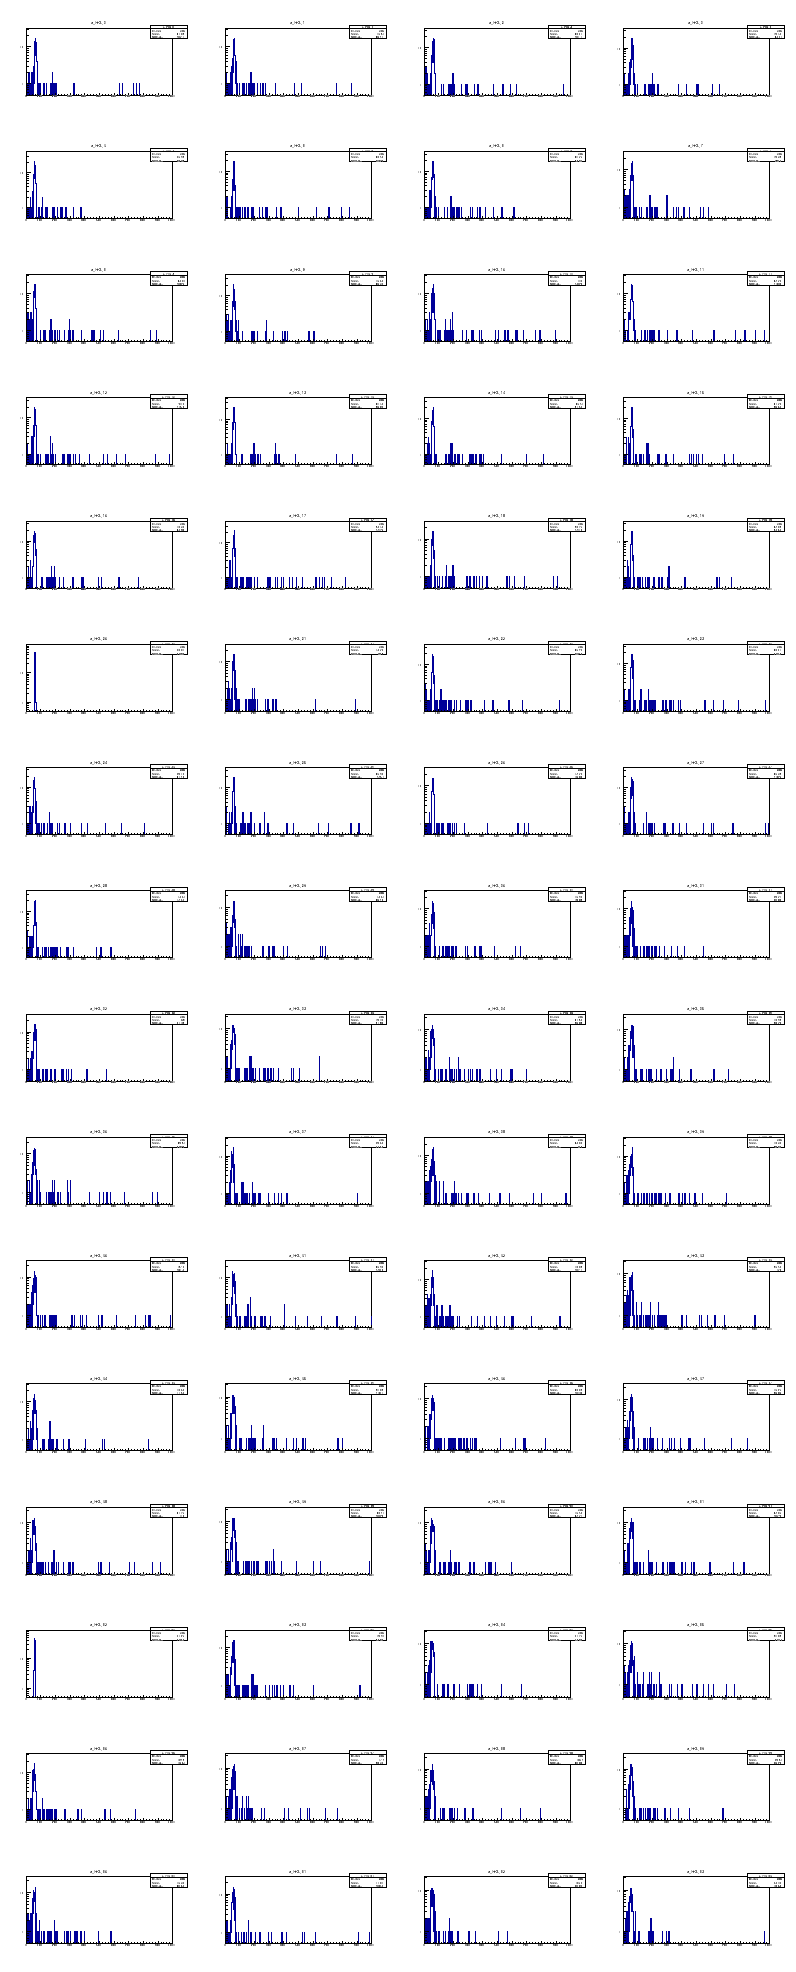

In [11]:
c1 = ROOT.TCanvas("c1","HG",800,2000)

c1.Divide(4,16)
for i in range(64):
    c1.cd(i+1)
    c1.GetPad(i+1).SetLogy()
    s="a_HG_"+str(i)
    h1[s].Draw()
c1.Draw()

pdfname=prepdf+"06_HG_i"+postpdf
c1.SaveAs(pdfname)

Info in <TCanvas::Print>: pdf file plotdir/plotMTS_run160_07_LG_i.pdf has been created


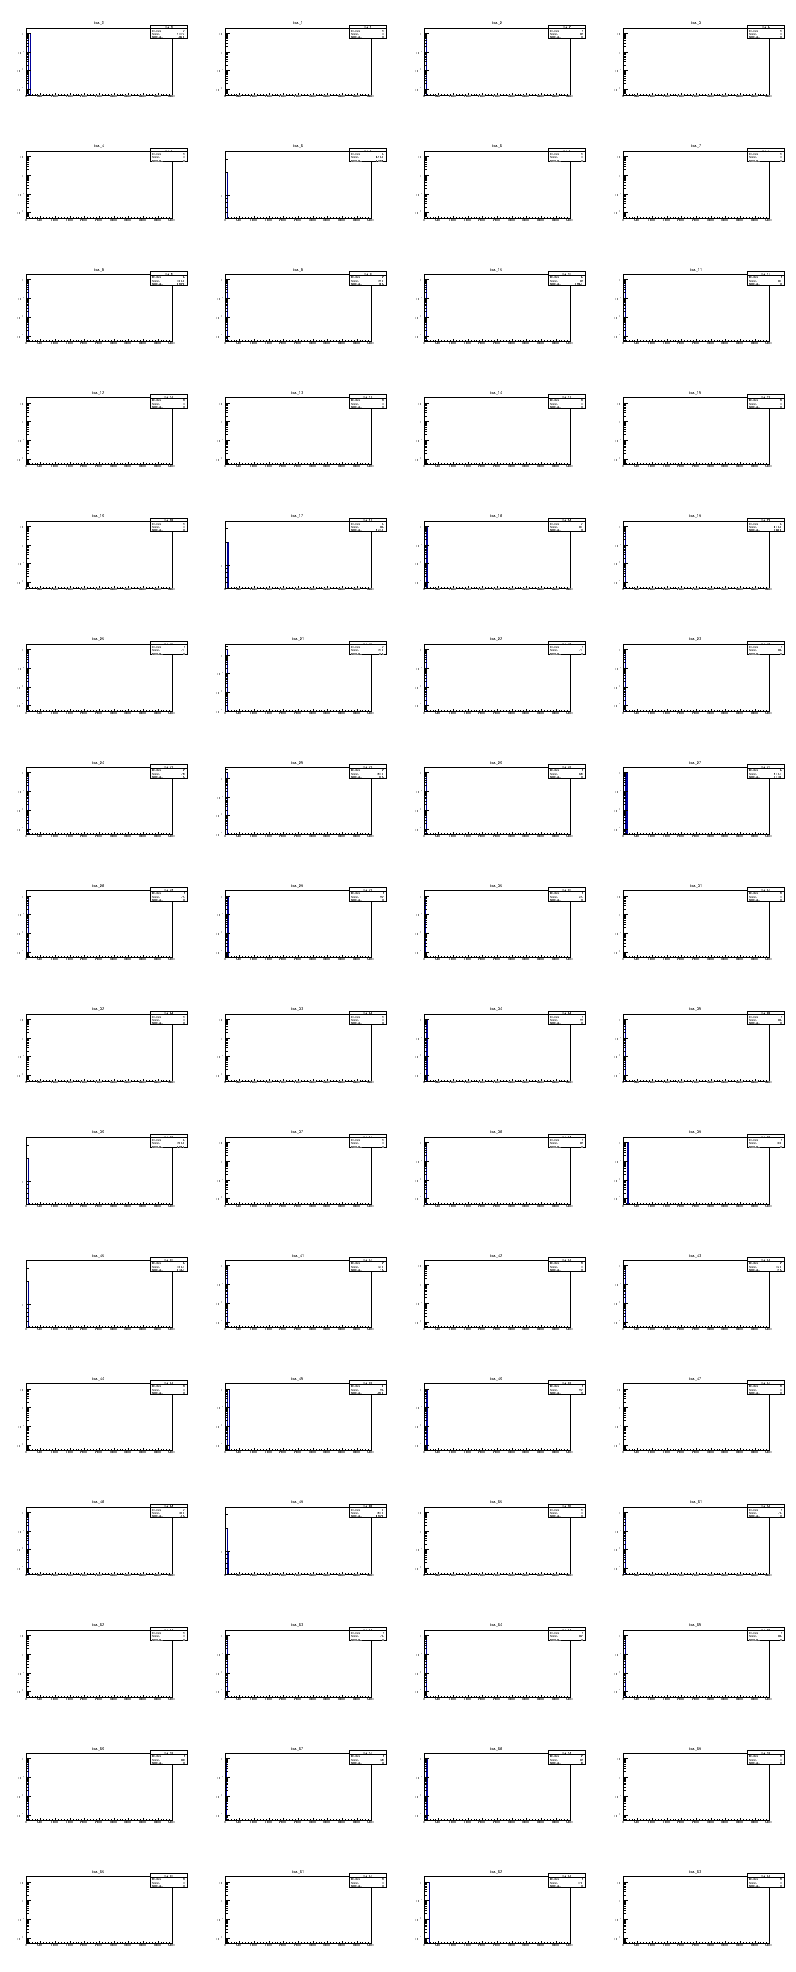

In [12]:
c3 = ROOT.TCanvas("c3","TOA",800,2000)

c3.Divide(4,16)
for i in range(64):
    c3.cd(i+1)
    c3.GetPad(i+1).SetLogy()
    s="toa_"+str(i)
    h1[s].Draw()
c3.Draw()

pdfname=prepdf+"07_LG_i"+postpdf
c3.SaveAs(pdfname)

In [13]:
ofile.Write()
ofile.Close()